## Name : Khairul Basar
## Roll : 1811176143

## Import necessary library 

In [28]:

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import R2Score

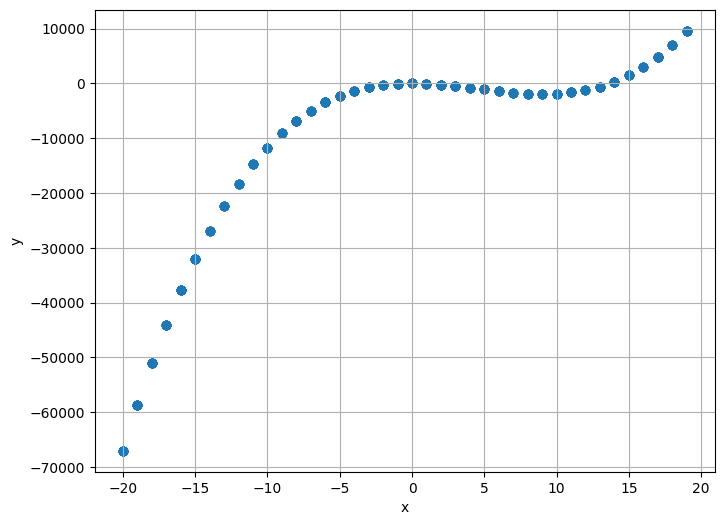

In [29]:
samples = 400
x = np.random.randint(-20, 20, samples, dtype=int)
y = 5 * (x**3) - 68 * (x**2) - 7 * x + 1

plt.figure(figsize=(8, 6))
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

plt.show()

In [30]:
x_normalized = (x - np.min(x)) / (np.max(x) - np.min(x)) * 2 - 1
y_normalized = (y - np.min(y)) / (np.max(y) - np.min(y)) * 2 - 1

#print(len(x_normalized), len(y_normalized))

In [31]:
x_train = x_normalized[ : int(len(x_normalized) * 0.8)]
y_train = y_normalized[: int(len(y_normalized) * 0.8)]

x_validate = x_normalized[int(len(x_normalized) * 0.8) : int(len(x_normalized) * 0.90)]
y_validate = y_normalized[int(len(y_normalized) * 0.8) : int(len(y_normalized) * 0.90)]

x_test = x_normalized[int(len(x_normalized) * 0.90) : ]
y_test = y_normalized[int(len(y_normalized) * 0.90) : ]

print(len(x_test), len(y_test))

40 40


In [32]:
inputs = Input(shape=(1), name = 'inputLayer')

h_layer = Dense(units = 32, activation = 'relu', name = 'hidden_layer1')(inputs)
h_layer = Dense(units = 64, activation = 'relu', name = 'hidden_layer2')(h_layer)
h_layer = Dense(units = 128, activation = 'relu', name = 'hidden_layer3')(h_layer)

outputs = Dense(units = 1, name = 'outputLayer')(h_layer)
model = Model(inputs, outputs, name = 'DNN_Model')
model.summary()

Model: "DNN_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   


 inputLayer (InputLayer)     [(None, 1)]               0         
                                                                 
 hidden_layer1 (Dense)       (None, 32)                64        
                                                                 
 hidden_layer2 (Dense)       (None, 64)                2112      
                                                                 
 hidden_layer3 (Dense)       (None, 128)               8320      
                                                                 
 outputLayer (Dense)         (None, 1)                 129       
                                                                 
Total params: 10625 (41.50 KB)
Trainable params: 10625 (41.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [33]:
model.compile(
    optimizer = Adam(lr=0.0001),
    loss='mean_squared_error',
    metrics=R2Score()
)


In [40]:
history = model.fit(x_train, y_train, epochs = 10, validation_data = (x_validate, y_validate))

Epoch 1/10
10/10 [==============================] - 0s 47ms/step - loss: 0.0197 - r2_score: 0.9269 - val_loss: 0.0095 - val_r2_score: 0.9518
Epoch 2/10
10/10 [==============================] - 0s 16ms/step - loss: 0.0083 - r2_score: 0.9693 - val_loss: 0.0047 - val_r2_score: 0.9763
Epoch 3/10
10/10 [==============================] - 0s 18ms/step - loss: 0.0050 - r2_score: 0.9814 - val_loss: 0.0065 - val_r2_score: 0.9669
Epoch 4/10
10/10 [==============================] - 0s 19ms/step - loss: 0.0052 - r2_score: 0.9808 - val_loss: 0.0030 - val_r2_score: 0.9850
Epoch 5/10
10/10 [==============================] - 0s 29ms/step - loss: 0.0036 - r2_score: 0.9865 - val_loss: 0.0024 - val_r2_score: 0.9879
Epoch 6/10
10/10 [==============================] - 0s 23ms/step - loss: 0.0047 - r2_score: 0.9825 - val_loss: 0.0039 - val_r2_score: 0.9804
Epoch 7/10
10/10 [==============================] - 0s 20ms/step - loss: 0.0030 - r2_score: 0.9888 - val_loss: 0.0018 - val_r2_score: 0.9908
Epoch 8/10
10

In [41]:
y_pred = model.predict(x_test)
y_pred.shape

2/2 [==============================] - 0s 7ms/step


In [36]:
x_test = ((x_test + 1) * (np.max(x) - np.min(x)) / 2) + np.min(x)
y_test = ((y_test + 1) * (np.max(y) - np.min(y)) / 2) + np.min(y)
y_pred = ((y_pred + 1) * (np.max(y) - np.min(y)) / 2) + np.min(y)

In [37]:
print('Actual X Value: ', x_test[6])
print('Actual Y Value: ', y_test[6])
print('Predicted Y Value: ', y_pred[6])

Actual X Value:  -15.0
Actual Y Value:  -32069.0
Predicted Y Value:  [-37376.0944317]


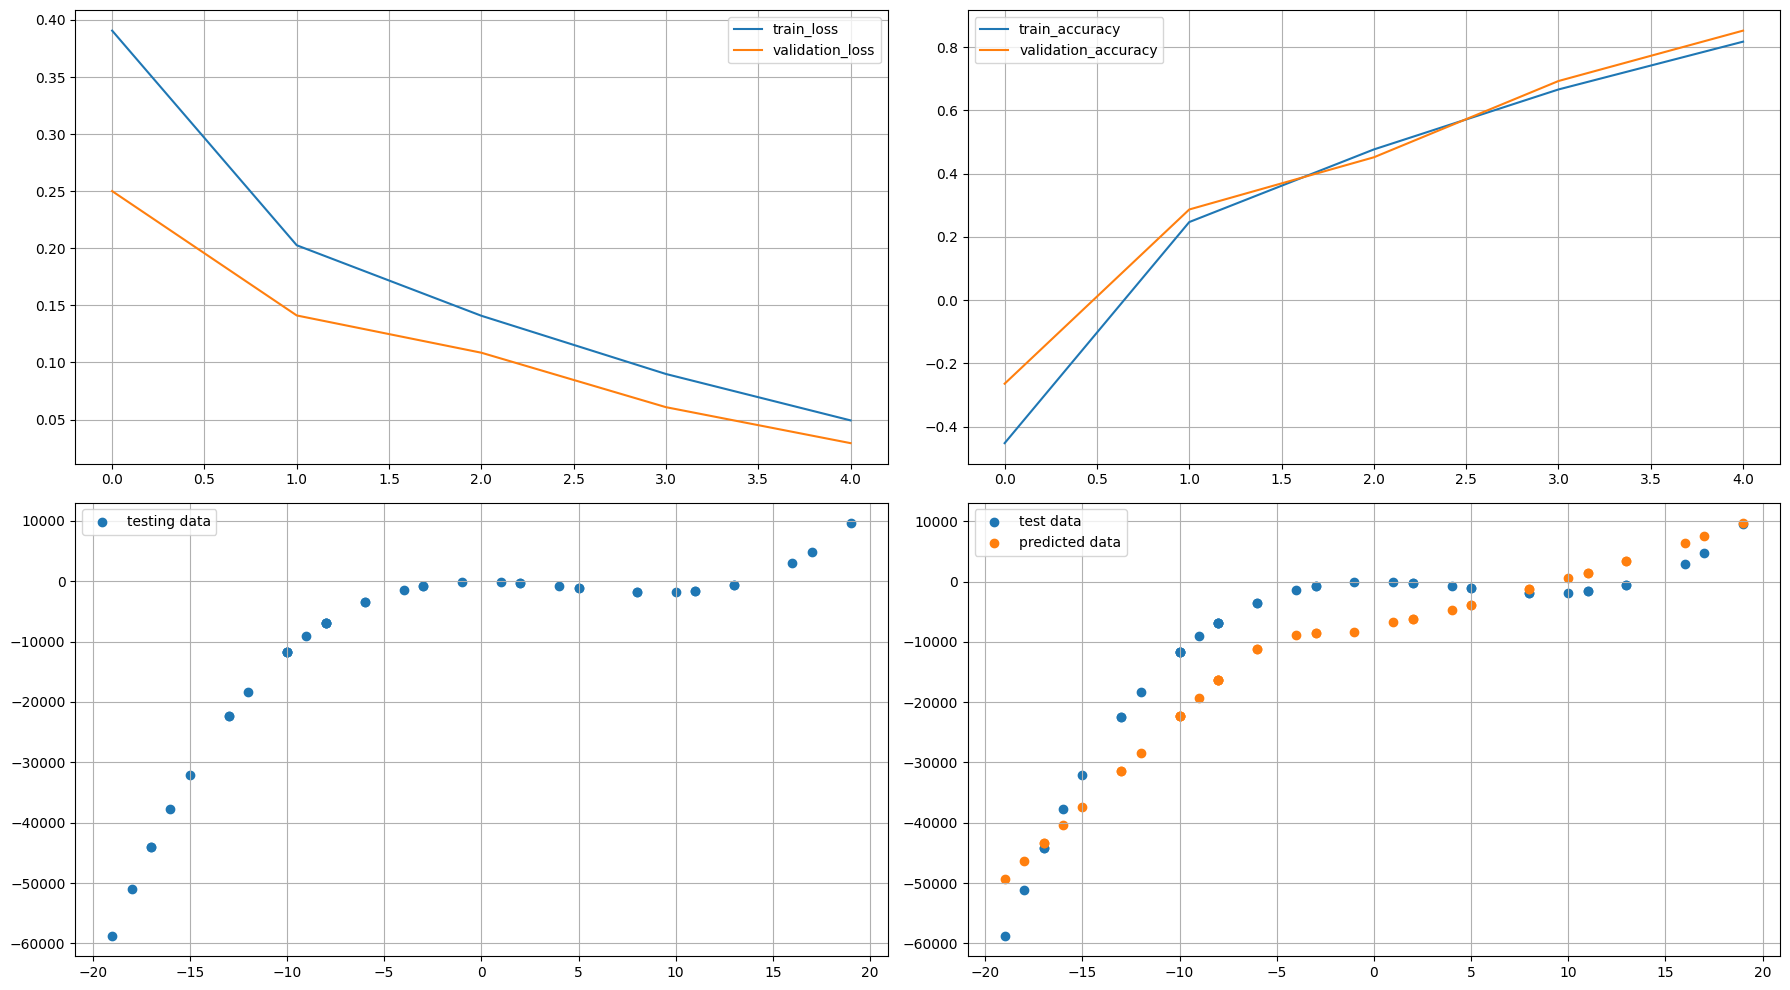

In [38]:
performance_dict = history.history
plt.figure(figsize = (18, 10))

plt.subplot(2,2,1)
plt.plot(performance_dict['loss'])
plt.plot(performance_dict['val_loss'])
plt.legend(['train_loss', 'validation_loss'])
plt.grid()

plt.subplot(2,2,2)
plt.plot(performance_dict['r2_score'])
plt.plot(performance_dict['val_r2_score'])
plt.legend(['train_accuracy', 'validation_accuracy'])
plt.grid()

plt.subplot(2,2,3)
plt.scatter(x_test, y_test)
plt.legend(['testing data'])
plt.grid()

plt.subplot(2,2,4)
plt.scatter(x_test, y_test)
plt.scatter(x_test, y_pred)
plt.legend(['test data', 'predicted data'])
plt.grid()

plt.tight_layout()
plt.show()

In [39]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

2/2 [==============================] - 0s 10ms/step - loss: 367932672.0000 - r2_score: -0.4275
Test Loss: 367932672.0
Test Accuracy: -0.42752552032470703
